In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split

df = pd.read_csv("D:\\Education\\3 rok AGH\\5 Semestr\\AiBD\\pandas_project\\Lab_9_Matyiashchyk\\data.csv", sep=',')
#Sprawdzenie danych tekstowych i liczbowych i zapisujemy do odpowiednich zmiennych
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)



There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [2]:
#Sprawdzenie braków
for var in categorical: 

    #print(df[var].value_counts()/np.float(len(df)))
    df1 = df.replace(' ?', np.NaN)
    #print(df1)
    df1.to_csv( "D:\\Education\\3 rok AGH\\5 Semestr\\AiBD\\pandas_project\\Lab_9_Matyiashchyk\\NaN.csv", sep=',')

    df2 = df1[categorical].isnull().sum()
    df_workclass = df1['workclass'].isnull().sum()
    print(df_workclass)

1836
1836
1836
1836
1836
1836
1836
1836
1836


In [3]:
#Split data
from sklearn.model_selection import train_test_split
X = df1.drop(['race'], axis=1)
y = df1['race']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True) 
    #Sprawdzenie 
    df_native = df2.native_country.value_counts()
    df_occupation = df2.occupation.value_counts()
    #df_workclass = df2.workclass.value_counts()
    df_workclass = df2['workclass'].isnull().sum()
    print(df_workclass) 
    

0
0


In [4]:
#Feature engineering and scaling
import category_encoders as ce
from sklearn.preprocessing import RobustScaler
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'sex', 'native_country', 'income',])
X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)
X_test.shape

cols = X_train.columns
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

X_train.head()

d:\Education\3 rok AGH\5 Semestr\AiBD\pandas_project\studysession\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
d:\Education\3 rok AGH\5 Semestr\AiBD\pandas_project\studysession\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
d:\Education\3 rok AGH\5 Semestr\AiBD\pandas_project\studysession\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
d:\Education\3 rok AGH\5 Semestr\AiBD\pandas_project\studysession\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41,income_1,income_2
0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.058906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0
1,0.50,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.578076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0
3,-0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.270650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
y_pred

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
y_pred_train = gnb.predict(X_train)
y_pred_train
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))
print(y_test.value_counts())
null_accuracy = (7407/(7407+2362))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Model accuracy score: 0.6721
Training-set accuracy score: 0.6763
Training set score: 0.6763
Test set score: 0.6721
 White                 8388
 Black                  911
 Asian-Pac-Islander     318
 Amer-Indian-Eskimo      80
 Other                   72
Name: race, dtype: int64
Null accuracy score: 0.7582


Text(46.7222222222222, 0.5, 'Actual values')

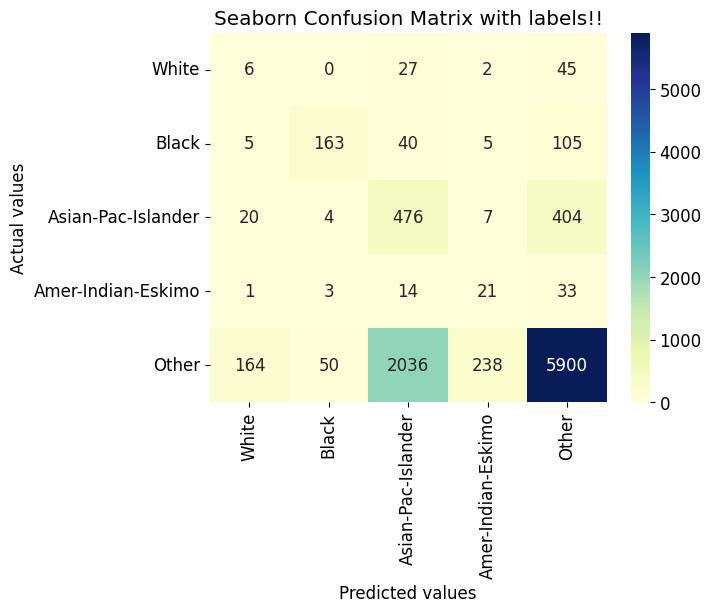

In [51]:
#Confussion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['White', 'Black', 'Asian-Pac-Islander','Amer-Indian-Eskimo','Other'], 
                                 index=['White', 'Black', 'Asian-Pac-Islander','Amer-Indian-Eskimo','Other'])

ax = sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
ax.set_title('Seaborn Confusion Matrix with labels!!')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Actual values')
# ax.xaxis.set_ticklabels(['White', 'Black', 'Asian-Pac-Islander','Amer-Indian-Eskimo','Other'])
# ax.yaxis.set_ticklabels(['White', 'Black', 'Asian-Pac-Islander','Amer-Indian-Eskimo','Other'])

In [56]:
#Liczymy znaczenia TP TN FP FN dla każdej klasy, skoro nie mamy już do czynienie nie z binarnym klasyfikatorem, lecz multiklasowym.
TP_White = cm[0,0] 
FN_White = cm[0,1] + cm[0,2] + cm[0,3] + cm[0,4]
FP_White = cm[1,0] + cm[2,0] + cm[3,0] + cm[4,0]
TN_White = cm[1,1] + cm[1,2] + cm[1,3] + cm[1,4] + cm[2,1] + cm[2,2] + cm[2,3] + cm[2,4] + cm[3,1] + cm[3,2] + cm[3,3] + cm[3,4] + cm[4,1] + cm[4,2] + cm[4,3] + cm[4,4] 

TP_Black = cm[1,1] 
FN_Black = cm[1,0] + cm[1,2] + cm[1,3] + cm[1,4]
FP_Black = cm[0,1] + cm[2,1] + cm[3,1] + cm[4,1]
TN_Black = cm[0,0] + cm[0,2] + cm[0,3] + cm[0,4] + cm[2,0] + cm[2,2] + cm[2,3] + cm[2,4] + cm[3,0] + cm[3,2] + cm[3,3] + cm[3,4] + cm[4,0] + cm[4,2] + cm[4,3] + cm[4,4] 

TP_Asian = cm[2,2] 
FN_Asian = cm[2,3] + cm[2,4] + cm[2,0] + cm[2,1]
FP_Asian = cm[0,2] + cm[1,2] + cm[3,2] + cm[4,2]
TN_Asian = cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1] + cm[3,0] + cm[3,1] + cm[4,0] + cm[4,1] + cm[3,3] + cm[3,4] + cm[4,3] + cm[4,4] + cm[0,3] + cm[0,4] + cm[1,3] + cm[1,4]

TP_Amer = cm[3,3] 
FN_Amer = cm[3,4] + cm[3,2] + cm[3,1] + cm[3,0]
FP_Amer = cm[4,3] + cm[2,3] + cm[1,3] + cm[0,3]
TN_Amer = cm[0,0] + cm[0,1] + cm[0,2] + cm[1,0] + cm[1,1] + cm[1,2] + cm[2,0] + cm[2,1] + cm[2,2] + cm[0,4] + cm[4,0] + cm[4,1] + cm[4,2] + cm[4,4] + cm[2,4] + cm[1,4]

TP_Other = cm[4,4] 
FN_Other = cm[4,0] + cm[4,1] + cm[4,2] + cm[4,3]
FP_Other = cm[0,4] + cm[1,4] + cm[2,4] + cm[3,4]
TN_Other = cm[0,0] + cm[0,1] + cm[0,2] + cm[1,0] + cm[1,1] + cm[1,2] + cm[2,0] + cm[2,1] + cm[2,2] + cm[0,4] + cm[4,0] + cm[4,1] + cm[4,2] + cm[4,4] + cm[2,4] + cm[1,4]

classification_accuracy_White = (FP_White + TN_White) / float(TP_White + TN_White + FP_White + FN_White)
print('Classification accuracy klasy White : {0:0.4f}'.format(classification_accuracy_White))
classification_accuracy_Black = (FP_Black + TN_Black) / float(TP_Black + TN_Black + FP_Black + FN_Black)
print('Classification accuracy klasy Black : {0:0.4f}'.format(classification_accuracy_Black))
classification_accuracy_Asian = (FP_Asian + TN_Asian) / float(TP_Asian + TN_Asian + FP_Asian + FN_Asian)
print('Classification accuracy klasy Asian - Pac - Islander: {0:0.4f}'.format(classification_accuracy_Asian))
classification_accuracy_Amer = (FP_Amer + TN_Amer) / float(TP_Amer + TN_Amer + FP_Amer + FN_Amer)
print('Classification accuracy klasy Amer-Indian - Eskimo: {0:0.4f}'.format(classification_accuracy_Amer))
classification_accuracy_Other= (FP_Other + TN_Other) / float(TP_Other + TN_Other + FP_Other + FN_Other)
print('Classification accuracy klasy Other: {0:0.4f}'.format(classification_accuracy_Other))




Classification accuracy klasy White : 0.9918
Classification accuracy klasy Black : 0.9674
Classification accuracy klasy Asian - Pac - Islander: 0.9067
Classification accuracy klasy Amer-Indian - Eskimo: 0.9926


In [26]:
# Classification metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(classification_report(y_test, y_pred))

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

                     precision    recall  f1-score   support

 Amer-Indian-Eskimo       0.03      0.07      0.04        80
 Asian-Pac-Islander       0.74      0.51      0.61       318
              Black       0.18      0.52      0.27       911
              Other       0.08      0.29      0.12        72
              White       0.91      0.70      0.79      8388

           accuracy                           0.67      9769
          macro avg       0.39      0.42      0.37      9769
       weighted avg       0.82      0.67      0.73      9769

Classification accuracy : 0.9713
Classification error : 0.0287
Precision : 1.0000
Recall or Sensitivity : 0.5455
True Positive Rate : 0.5455
False Positive Rate : 0.0000
Specificity : 1.0000

Accuracy: 0.67

Micro Precision: 0.67
Micro Recall: 0.67
Micro F1-score: 0.67

Macro Precision: 0.39
Macro Recall: 0.42
Macro F1-score: 0.37



[[4.07751723e-02 4.12540620e-06 9.10388004e-01 1.19495723e-04
  4.87132024e-02]
 [5.64600719e-03 1.68156101e-03 1.05855102e-01 8.58103100e-04
  8.85959227e-01]
 [5.49446336e-03 1.44355093e-04 1.30176416e-02 5.82774635e-05
  9.81285263e-01]
 [1.26193240e-11 9.43331834e-05 5.92630794e-04 3.42423575e-05
  9.99278794e-01]
 [1.76002710e-23 1.05668003e-06 3.07791700e-06 1.26611579e-12
  9.99995865e-01]
 [2.24274284e-03 2.51515173e-03 8.38636360e-04 4.46985483e-05
  9.94358771e-01]
 [3.72098354e-02 4.54148044e-07 9.50709062e-01 1.12763736e-05
  1.20693723e-02]
 [9.80046135e-02 2.22845855e-05 5.85299904e-01 2.52913982e-04
  3.16420284e-01]
 [1.45507354e-01 2.60847308e-05 3.26382904e-02 1.04697200e-07
  8.21828166e-01]
 [5.70002766e-02 9.66740483e-05 7.49941205e-01 3.29438722e-04
  1.92632406e-01]]
          White         Black  Asian-Pac-Islander  Amer-Indian-Eskimo  \
0  4.077517e-02  4.125406e-06            0.910388        1.194957e-04   
1  5.646007e-03  1.681561e-03            0.105855    

d:\Education\3 rok AGH\5 Semestr\AiBD\pandas_project\studysession\lib\site-packages\sklearn\metrics\_ranking.py:1018: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


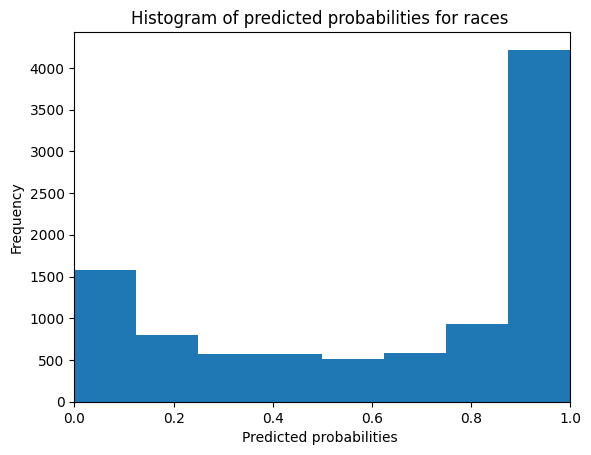

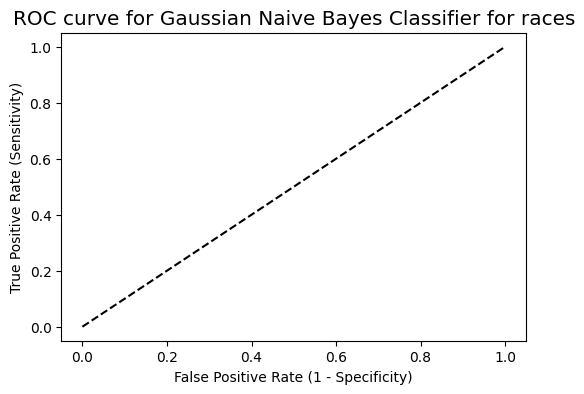

In [14]:
y_pred_prob = gnb.predict_proba(X_test)[0:10]
print(y_pred_prob)

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['White', 'Black', 'Asian-Pac-Islander','Amer-Indian-Eskimo','Other'])
print(y_pred_prob_df) 
gnb.predict_proba(X_test)[0:10, 1]

y_pred1 = gnb.predict_proba(X_test)[:, 4]
# plot histogram of predicted probabilities
# adjust the font size 
plt.rcParams['font.size'] = 10
# plot histogram with 10 bins
plt.hist(y_pred1, bins = 8)
# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities for races ')
# set the x-axis limit
plt.xlim(0,1)
# set the title
plt.xlabel('Predicted probabilities ')
plt.ylabel('Frequency')

# plot ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'White')
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=5)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Gaussian Naive Bayes Classifier for races')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()



